# Homework 5
This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [25]:
#install.packages("Rtsne")
library(tidyverse)
library(Rtsne)

## Question 1  

#### a) Import your data.  
#### b) Check out the columns present using one of R's data frame summary.  
#### c) Get summary statistics on the numeric variables.  

In [26]:
#a
wine <- read.csv("/content/wine.csv")

In [27]:
#b
glimpse(wine)

Rows: 178
Columns: 14
$ Alcohol                       <dbl> 14.23, 13.20, 13.16, 14.37, 13.24, 14.20…
$ Malicacid                     <dbl> 1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.87…
$ Ash                           <dbl> 2.43, 2.14, 2.67, 2.50, 2.87, 2.45, 2.45…
$ Alcalinity_of_ash             <dbl> 15.6, 11.2, 18.6, 16.8, 21.0, 15.2, 14.6…
$ Magnesium                     <int> 127, 100, 101, 113, 118, 112, 96, 121, 9…
$ Total_phenols                 <dbl> 2.80, 2.65, 2.80, 3.85, 2.80, 3.27, 2.50…
$ Flavanoids                    <dbl> 3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.52…
$ Nonflavanoid_phenols          <dbl> 0.28, 0.26, 0.30, 0.24, 0.39, 0.34, 0.30…
$ Proanthocyanins               <dbl> 2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1.98…
$ Color_intensity               <dbl> 5.64, 4.38, 5.68, 7.80, 4.32, 6.75, 5.25…
$ Hue                           <dbl> 1.04, 1.05, 1.03, 0.86, 1.04, 1.05, 1.02…
$ X0D280_0D315_of_diluted_wines <dbl> 3.92, 3.40, 3.17, 3.45, 2.93, 2.85, 3.58…
$ Proline         

In [28]:
#c
summary(wine)

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?


In [29]:
#a)
wine_scaled <- wine %>%
  mutate(
  across(
    .cols = -class,
    .fns = function(x) as.numeric(scale(x))
  )
  )

summary(wine_scaled)

    Alcohol           Malicacid            Ash           Alcalinity_of_ash  
 Min.   :-2.42739   Min.   :-1.4290   Min.   :-3.66881   Min.   :-2.663505  
 1st Qu.:-0.78603   1st Qu.:-0.6569   1st Qu.:-0.57051   1st Qu.:-0.687199  
 Median : 0.06083   Median :-0.4219   Median :-0.02375   Median : 0.001514  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.000000  
 3rd Qu.: 0.83378   3rd Qu.: 0.6679   3rd Qu.: 0.69614   3rd Qu.: 0.600395  
 Max.   : 2.25341   Max.   : 3.1004   Max.   : 3.14745   Max.   : 3.145637  
   Magnesium       Total_phenols        Flavanoids      Nonflavanoid_phenols
 Min.   :-2.0824   Min.   :-2.10132   Min.   :-1.6912   Min.   :-1.8630     
 1st Qu.:-0.8221   1st Qu.:-0.88298   1st Qu.:-0.8252   1st Qu.:-0.7381     
 Median :-0.1219   Median : 0.09569   Median : 0.1059   Median :-0.1756     
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000     
 3rd Qu.: 0.5082   3rd Qu.: 0.80672   3rd Qu.: 0.8467   3rd Qu.: 0.6078     

#b)
Based on the summary statistics from question 2, there were some variables that had a large range of numbers and some varibales that had a small range of numbers. By scaling our data, we are centering each variable to have a center of 0 to ensure that PCA is capturing variation rather than the bias from the original numbers, puts all the variables on the same scale to prevent those with larger numbers to dominate the variables with smaller numbers. This helps properly determine a pattern for correlation.

## Question 3

#### a) Perform PCA

#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?

#### c) Why are we doing PCA first?

#### d) What is the rotation matrix? Print it explicitly.  
*Hint:* Check the notes for a simple way to do this!

#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  
*Hint:* You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
*Hint:* Our notes have a few examples!

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.


In [30]:
#a)
pca_wine <- prcomp(wine_scaled, center = TRUE, scale. = TRUE)
summary(pca_wine)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.3529 1.5802 1.2025 0.96328 0.93675 0.82023 0.74418
Proportion of Variance 0.3954 0.1784 0.1033 0.06628 0.06268 0.04806 0.03956
Cumulative Proportion  0.3954 0.5738 0.6771 0.74336 0.80604 0.85409 0.89365
                          PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.5916 0.54272 0.51216 0.47524 0.41085 0.35995 0.24044
Proportion of Variance 0.0250 0.02104 0.01874 0.01613 0.01206 0.00925 0.00413
Cumulative Proportion  0.9186 0.93969 0.95843 0.97456 0.98662 0.99587 1.00000

#b)
The amount of variance explained by PC1 is 39.5% of total variance, and the amount of variance explained by PC2 is 17.8% of total variance. The function we use to see this information is summary().

#c)
We do a PCA first to simplify large data into a smaller set of independent variables and remove any correlations that might already exist. It makes the data easier to visualize, analyze, and process.

In [31]:
#d)
pca_wine$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Alcohol,-0.136325011,-0.484160868,-0.207400812,-0.08191848,0.25089415,0.13517139,0.09269887,-0.42154435,-0.450190708,0.31127983,0.22154641,-0.26411262,-0.05610645,0.090626055
Malicacid,0.222676383,-0.223590947,0.088796064,0.46988824,0.18860015,0.59841948,-0.37436980,-0.08757556,-0.006025687,-0.32592413,-0.06839251,0.11921210,0.06675544,-0.025225306
Ash,-0.002257932,-0.315855884,0.626102363,-0.24984122,0.09352360,0.10799983,0.16708856,0.17208034,0.262494455,-0.12452347,0.49452428,-0.04502305,-0.19201787,-0.001635816
Alcalinity_of_ash,0.224298489,0.011615737,0.611989600,0.07199322,-0.04656750,-0.08811224,0.26872469,-0.41324857,-0.118633417,0.15716811,-0.47461722,-0.06131271,0.20007784,-0.095361066
Magnesium,-0.124630159,-0.300551432,0.130984580,-0.16321412,-0.77833048,0.14483831,-0.32957951,0.14881189,-0.252536278,0.12773363,-0.07119731,0.06116074,0.05829909,0.022300745
Total_phenols,-0.359264042,-0.067119829,0.146507749,0.19098521,0.14466563,-0.14809748,0.03789829,0.36343884,-0.406373544,-0.30772263,-0.29740957,-0.30087591,-0.35952714,-0.253037788
Flavanoids,-0.390711715,0.001313454,0.150962746,0.14461667,0.11200553,-0.06247252,0.06773223,0.17540500,-0.090919334,-0.14044000,0.03219187,-0.05001396,0.59834288,0.601909165
Nonflavanoid_phenols,0.267001203,-0.026988703,0.169975512,-0.32801272,0.43257916,-0.25868639,-0.61111195,0.23075135,-0.159122818,0.24054263,-0.12200984,0.04266558,0.06403952,0.082230935
Proanthocyanins,-0.279062504,-0.041222563,0.149879586,0.46275771,-0.09158820,-0.46627764,-0.42292282,-0.34373920,0.265786794,0.10869629,0.23292405,-0.09334264,-0.11013538,-0.058641979
Color_intensity,0.089318293,-0.529782740,-0.137266298,0.07211248,0.04626960,-0.42525454,0.18613617,0.04069617,-0.075264592,-0.21704255,-0.01972448,0.59795428,0.15917751,-0.178821145


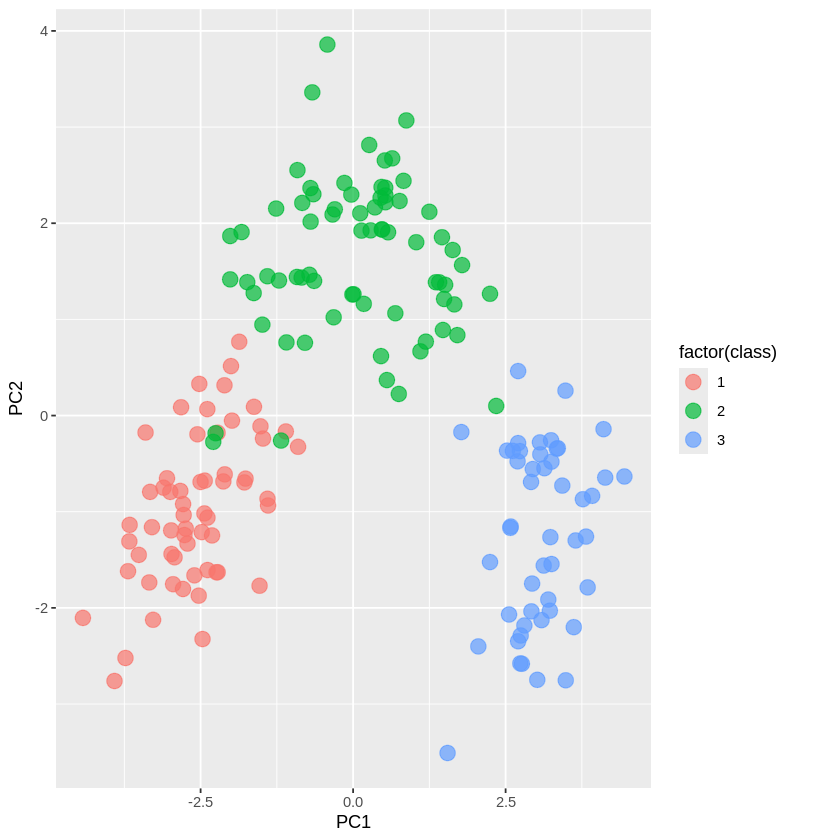

In [32]:
#e)
wine_only_pca <- as_tibble(pca_wine$x) %>%
  select(PC1, PC2) %>%
  mutate(class = wine_scaled$class)

ggplot(wine_only_pca, aes(x = PC1, y = PC2, color = factor(class))) +
  geom_point(size = 4, alpha = 0.7)

#f)
After seeing the PCA plot, we can see that wines from the same class cluster together around PCA1/PCA2, indicating that PCA shows the differences in the wine classes based on the composition.

#g)
Examples where a PCA would fail is if the data is arranged in circles, clusters, or any other nonlinear shape. PCA looks for linear structure to analyze the variances. In the example from class, the failed data was constructed in concentric circles, there the only variation stemmed from the varying radius for each circle. However because the data was not linear, there was no rotation that could have split the axes, thus PCA would not be able to be run.

#h)
The difference between a vector space and a manifold is that a PCA assumes that data lives in a vector space, where linear combinations capture the variance. However, real world data typically lives in a manifold, where in the local space it is linear, but globally it could be curved. With a t-SNE, it preserves the local space, essentially bring the manifold to a lower dimension while preserving the structure and probabilities.

## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### c) Why didn't we stop at PCA?


#### d) What other types of data does this workflow make sense for?



In [33]:
#a)
tsne_wine <- as_tibble(pca_wine$x) %>%
  select(PC1:PC10) %>%
  mutate(class = wine_scaled$class) %>%
  distinct()

tsne_numeric <- tsne_wine %>%
  select(-class) %>%
  as.matrix()

set.seed(123)
results <- Rtsne(tsne_numeric, dims=2, perplexity=30, verbose=TRUE, check_duplicates=FALSE)

wine_plot <- as_tibble(results$Y) %>%
  rename(TSNE1 = V1, TSNE2 = V2) %>%
  mutate(class=wine_scaled$class)

Performing PCA
Read the 178 x 10 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.01 seconds (sparsity = 0.610213)!
Learning embedding...
Iteration 50: error is 49.831755 (50 iterations in 0.02 seconds)
Iteration 100: error is 50.330684 (50 iterations in 0.02 seconds)
Iteration 150: error is 51.224648 (50 iterations in 0.02 seconds)
Iteration 200: error is 50.796777 (50 iterations in 0.02 seconds)
Iteration 250: error is 49.850371 (50 iterations in 0.02 seconds)
Iteration 300: error is 0.475958 (50 iterations in 0.02 seconds)
Iteration 350: error is 0.344963 (50 iterations in 0.01 seconds)
Iteration 400: error is 0.345161 (50 iterations in 0.01 seconds)
Iteration 450: error is 0.349556 (50 iterations in 0.01 seconds)
Iteration 500: error is 0.347533 (50 iterations in 0.01 seconds)
Iteration 550: error is 0.348368 (50 iterations in 0.01 seconds)
Iteration 600

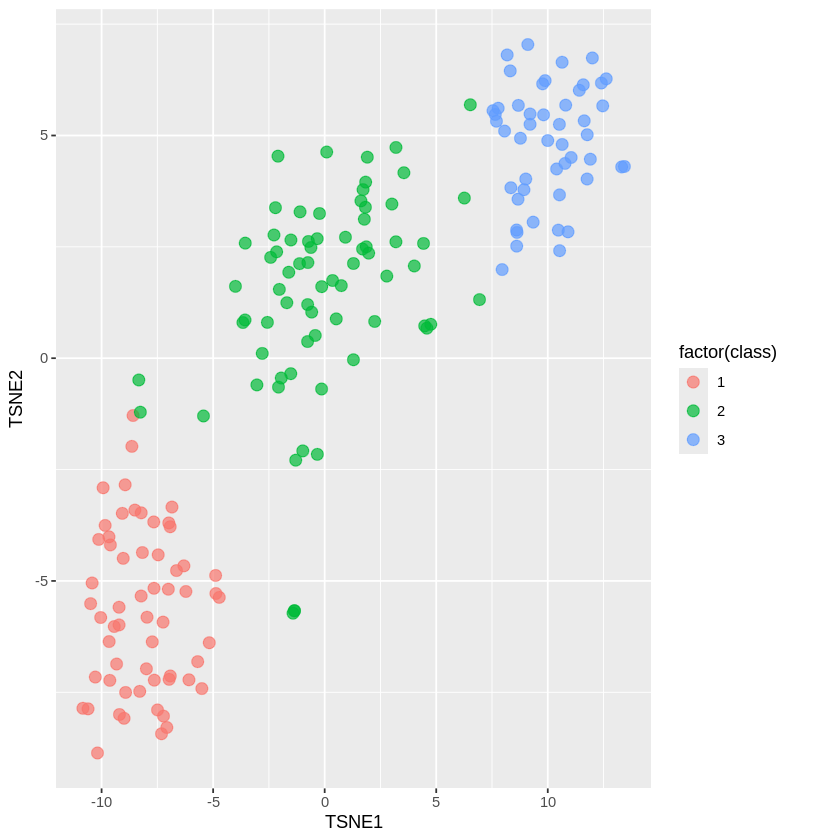

In [34]:
#b)
ggplot(wine_plot, aes(x=TSNE1, y=TSNE2, color=factor(class))) +
  geom_point(size=3, alpha=0.7)

#c)
PCA would only work if the data had a linear structure, but because the data has clusters, a TSNE is performed to be able to visualize it.

#d)
A T-SNE could work for other high-dimensional and nonlinear data types. Some could include image data, genomics/bioinformatics, etc.